# College Application

### Importing the libraries

In [1]:
import numpy as np
import sklearn as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading the Dataset 

In [2]:
college=pd.read_csv('College_Admissions.csv')
college.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
print(college.shape)

(400, 9)


In [4]:
print(college.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [5]:
college.drop('Serial No.', axis=1, inplace =True)

In [6]:
print(college.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [7]:
college.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [8]:
print(college.shape)

(400, 8)


In [9]:
college.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [10]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [11]:
college.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


___________________________________________________________________________________________________________________________________________________________________

### Data Visualization

#### Visualization of all the features 

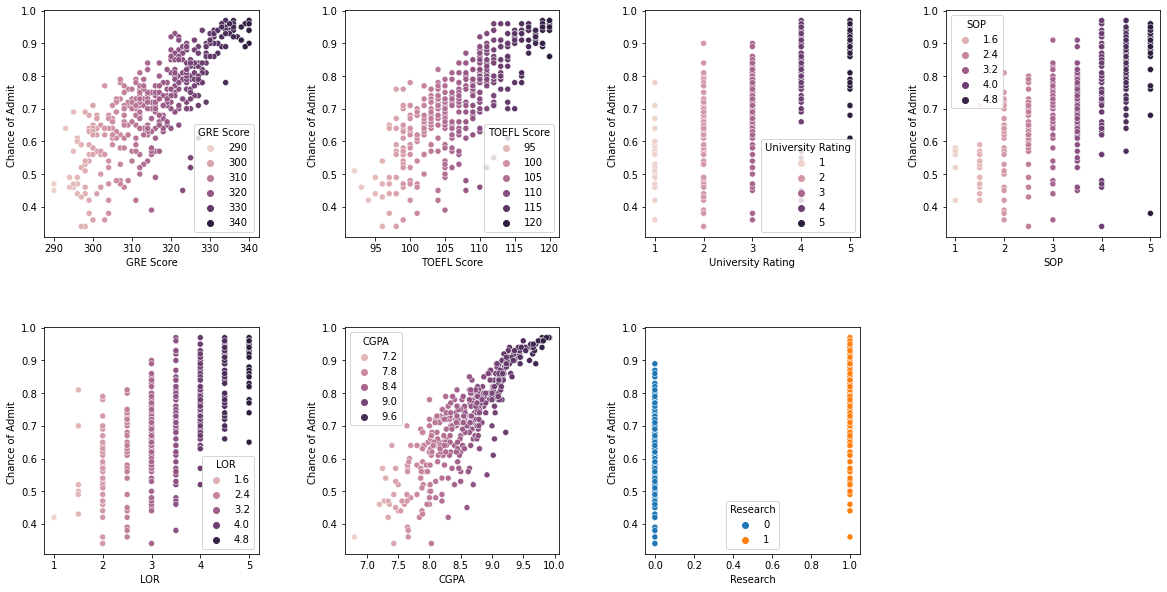

In [12]:
column_names = list(college.columns)
column_names.pop(-1)
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(column_names)):
    ax = fig.add_subplot(2, 4,i+1)
    sns.scatterplot(x = college[column_names[i]], y = college['Chance of Admit '], hue = college[column_names[i]] )

#### Visualizing GRE Data

In [13]:
GRE=pd.DataFrame(college['GRE Score'])
GRE.describe()

,GRE Score
count,400.000000
mean,316.807500
std,11.473646
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


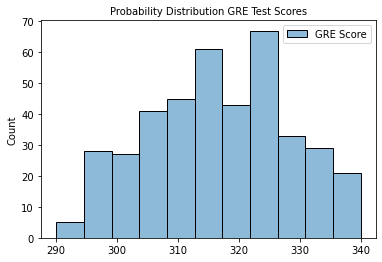

In [14]:
sns.histplot(GRE).set_title('Probability Distribution GRE Test Scores', size='10')
plt.show()

#### Visualizing TOEFL Dataset

In [15]:
TOEFL=pd.DataFrame(college['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,400.000000
mean,107.410000
std,6.069514
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


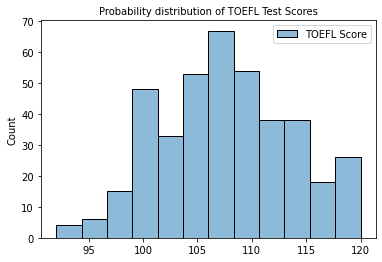

In [16]:
sns.histplot(TOEFL).set_title('Probability distribution of TOEFL Test Scores', size='10')
plt.show()

#### Visualizing University Rating Data

In [17]:
UNI_Rating= college.groupby(['University Rating']).count()
UNI_Rating = UNI_Rating['Chance of Admit ']
UNI_Rating= pd.DataFrame(UNI_Rating)
UNI_Rating.rename({'Chance of Admit ': 'Count'}, inplace=True, axis=1)
UNI_Rating

,Count
University Rating,
1,26
2,107
3,133
4,74
5,60


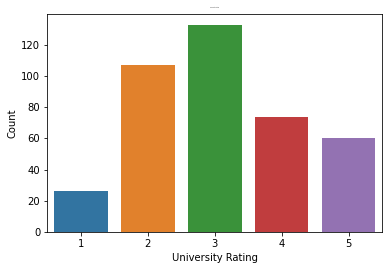

In [18]:
sns.barplot(x = UNI_Rating.index, y= UNI_Rating['Count']).set_title('University Rating', size='0')
plt.show()

#### Visualizing SOP Data

In [19]:
SOP = college.groupby(['SOP']).count()
SOP = pd.DataFrame(SOP['GRE Score'])
SOP.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
SOP

,Count
SOP,
1.0,6
1.5,20
2.0,33
2.5,47
3.0,64
3.5,70
4.0,70
4.5,53
5.0,37


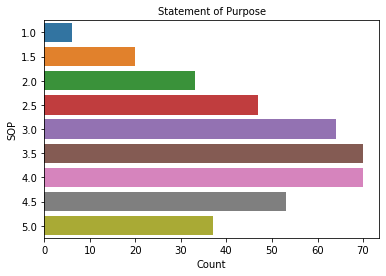

In [20]:
sns.barplot(x = SOP['Count'], y = SOP.index, orient = 'h').set_title('Statement of Purpose', size='10')
plt.show()

#### Visualizing LOR Data

In [21]:
LOR = college.groupby(['LOR ']).count()
LOR = pd.DataFrame(LOR['GRE Score'])
LOR.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
LOR

,Count
LOR,
1.0,1
1.5,7
2.0,38
2.5,39
3.0,85
3.5,73
4.0,77
4.5,45
5.0,35


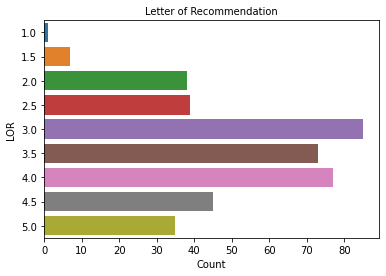

In [22]:
sns.barplot(x = LOR['Count'], y = LOR.index, orient = 'h').set_title('Letter of Recommendation', size='10')
plt.show()

#### Visualizing CGPA Data

In [23]:
CGPA = pd.DataFrame(college['CGPA'])
CGPA.describe()

,CGPA
count,400.000000
mean,8.598925
std,0.596317
min,6.800000
25%,8.170000
50%,8.610000
75%,9.062500
max,9.920000


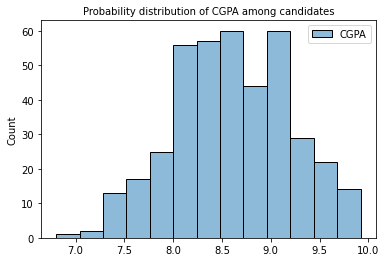

In [24]:
sns.histplot(CGPA).set_title('Probability distribution of CGPA among candidates', size = '10')
plt.show()

#### Visualizing Research Data

In [25]:
RES = college.groupby(['Research']).count()
RES = pd.DataFrame(RES['GRE Score'])
RES.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
RES

,Count
Research,
0,181
1,219


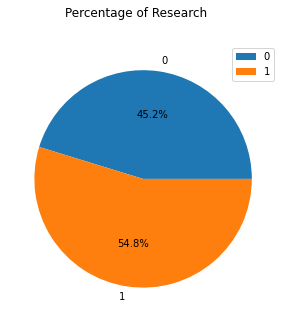

In [26]:
RES.plot(kind = 'pie', autopct="%.1f%%", subplots = True, title='Percentage of Research', ylabel = '', figsize = (8,5))
plt.show()

#### Visualizing Chance of Admit Data

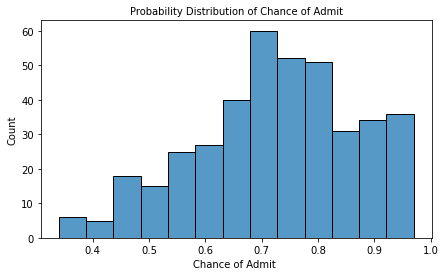

In [27]:
college['Chance of Admit ']
fig, ax = plt.subplots(figsize=(7,4))
sns.histplot(college['Chance of Admit '], ax=ax).set_title('Probability Distribution of Chance of Admit', size='10')
plt.show()

#### Visualizing the correlation between all the features with respect to the Chance of Admit

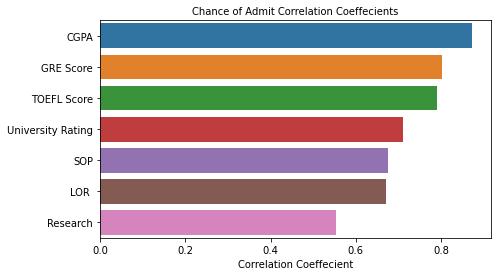

In [28]:
adm_corr = pd.DataFrame(college.corr()['Chance of Admit '])
adm_corr.rename({'Chance of Admit ': 'Correlation Coeffecient'}, axis=1, inplace=True)
adm_corr.drop('Chance of Admit ', inplace=True)
adm_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
adm_corr_x = adm_corr.index
adm_corr_y = adm_corr['Correlation Coeffecient']
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(y=adm_corr_x,x=adm_corr_y, ax=ax).set_title('Chance of Admit Correlation Coeffecients', size='10')
plt.show()

___________________________________________________________________________________________________________________________________________________________________

## Correlation Heat Map

Text(0.5, 1.0, 'Correlation Heat Map')

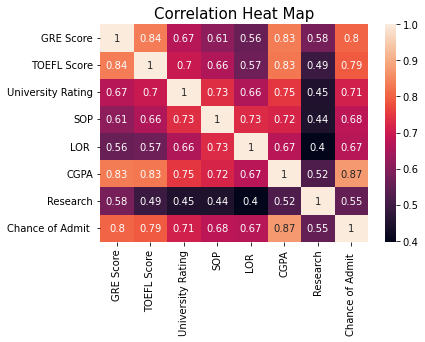

In [29]:
sns.heatmap(college.corr(), annot=True).set_title('Correlation Heat Map', color='black', size='15')

___________________________________________________________________________________________________________________

### Linear regression for whole dataset

In [30]:
X_lr=college.drop(['Chance of Admit '],axis=1)
y_lr=college['Chance of Admit '].values
X_lr.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [31]:
X_lr_train,X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr,shuffle=False, stratify=None, test_size=0.20, random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_lr_train=sc.fit_transform(X_lr_train)
X_lr_test=sc.transform(X_lr_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()

In [34]:
model=lr.fit(X_lr_train,y_lr_train)

In [35]:
y_pred_lr=lr.predict(X_lr_test)

In [36]:

y_pred_test_lr=model.predict(X_lr_train)
mean_squared_error(y_lr_train,y_pred_test_lr)


0.003982561606146842

In [37]:
from sklearn.metrics import mean_squared_error
print('The MSE for Linear regression Test set: ',mean_squared_error(y_lr_test,y_pred_lr))
print('The MSE for Linear regression Train set',mean_squared_error(y_lr_train,y_pred_test_lr))

The MSE for Linear regression Test set:  0.004190376431074912
The MSE for Linear regression Train set 0.003982561606146842


__________________________________________________________________________________________________________________

### Linear Regression for GRE Score, TOEFL Score, SOP, LOR, CGPA, Research (Removed University Rating)

In [38]:
X_2p = college[['GRE Score','TOEFL Score', 'LOR ', 'SOP', 'CGPA','Research']]
y_02 = college['Chance of Admit '].values
X_2p.columns

Index(['GRE Score', 'TOEFL Score', 'LOR ', 'SOP', 'CGPA', 'Research'], dtype='object')

In [39]:
X_02_train,X_02_test, y_02_train, y_02_test = train_test_split(X_2p, y_02, test_size=0.20, random_state=10)

In [40]:
X_02_train=sc.fit_transform(X_02_train)
X_02_test=sc.transform(X_02_test)
model2=lr.fit(X_02_train,y_02_train)
y_pred_lr_02=lr.predict(X_02_test)


y_pred_test_02=model2.predict(X_02_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_02_test,y_pred_lr_02))
print('The MSE for Linear regression Train set',mean_squared_error(y_02_train,y_pred_test_02))

The MSE for Linear regression Test set:  0.004344332724243961
The MSE for Linear regression Train set 0.003950635226171051


__________________________________________________________________________________________________________________

### Linear Regression for GRE Score, University Rating, SOP, LOR, CGPA, Research (Removed TOEFL)

In [41]:
X_3p = college[['GRE Score','University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y_03 = college['Chance of Admit '].values
X_3p.columns

Index(['GRE Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], dtype='object')

In [42]:
X_03_train,X_03_test, y_03_train, y_03_test = train_test_split(X_3p, y_03, test_size=0.20, random_state=120)

In [43]:
X_03_train=sc.fit_transform(X_03_train)
X_03_test=sc.transform(X_03_test)
model3=lr.fit(X_03_train,y_03_train)
y_pred_lr_03=lr.predict(X_03_test)


y_pred_test_03=model3.predict(X_03_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_03_test,y_pred_lr_03))
print('The MSE for Linear regression Train set',mean_squared_error(y_03_train,y_pred_test_03))

The MSE for Linear regression Test set:  0.004197787214807226
The MSE for Linear regression Train set 0.0040524265077046


__________________________________________________________________________________________________________________

### Linear Regression for GRE Score, TOEFL Score, University Rating, LOR, CGPA, Research (Removed SOP)

In [44]:
X_4p = college[['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ','CGPA','Research']]
y_04 = college['Chance of Admit '].values
X_4p.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [45]:
X_04_train,X_04_test, y_04_train, y_04_test = train_test_split(X_4p, y_04, test_size=0.20, random_state=140)

In [46]:
X_04_train=sc.fit_transform(X_04_train)
X_04_test=sc.transform(X_04_test)
model4=lr.fit(X_04_train,y_04_train)
y_pred_lr_04=lr.predict(X_04_test)


y_pred_test_04=model4.predict(X_04_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_04_test,y_pred_lr_04))
print('The MSE for Linear regression Train set',mean_squared_error(y_04_train,y_pred_test_04))

The MSE for Linear regression Test set:  0.00385573278219004
The MSE for Linear regression Train set 0.004043607597001474


__________________________________________________________________________________________________________________

### Linear Regression for GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA (Removed Research)

In [47]:
X_5p = college[['GRE Score','TOEFL Score', 'University Rating','SOP','LOR ','CGPA']]
y_05 = college['Chance of Admit '].values

In [48]:
X_05_train,X_05_test, y_05_train, y_05_test = train_test_split(X_5p, y_05, test_size=0.20, random_state=170)

In [49]:
X_05_train=sc.fit_transform(X_05_train)
X_05_test=sc.transform(X_05_test)
model5=lr.fit(X_05_train,y_05_train)
y_pred_lr_05=lr.predict(X_05_test)


y_pred_test_05=model5.predict(X_05_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_05_test,y_pred_lr_05))
print('The MSE for Linear regression Train set',mean_squared_error(y_05_train,y_pred_test_05))


The MSE for Linear regression Test set:  0.0030089754202416814
The MSE for Linear regression Train set 0.004371959793442481


C:\Users\vrund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


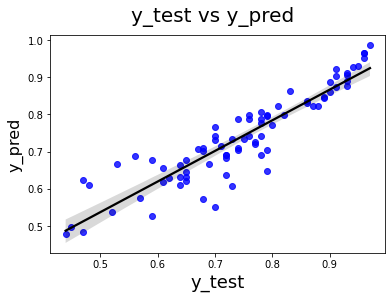

In [50]:
fig = plt.figure()
sns.regplot(y_05_test,y_pred_lr_05,data=college,scatter_kws={"color": "blue"}, line_kws={"color": "black"})
fig.suptitle('y_test vs y_pred', fontsize = 20)    

plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [51]:
#Saving to CSV file since it has lowest MSE
with open('pred_for_LR.csv', 'w') as f:
    for i in y_pred_lr_05:
        print(i, file=f)
        
    

__________________________________________________________________________________________________________________

### Linear Regression for TOEFL Score, University Rating, SOP, LOR, CGPA, Research (Removed GRE)

In [52]:
X_6p = college[['TOEFL Score', 'University Rating','SOP','LOR ','CGPA','Research']]
y_06 = college['Chance of Admit '].values

In [53]:
X_06_train,X_06_test, y_06_train, y_06_test = train_test_split(X_6p, y_06, test_size=0.20, random_state=150)

In [54]:
X_06_train=sc.fit_transform(X_06_train)
X_06_test=sc.transform(X_06_test)
model6=lr.fit(X_06_train,y_06_train)
y_pred_lr_06=lr.predict(X_06_test)

y_pred_test_06=model6.predict(X_06_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_06_test,y_pred_lr_06))
print('The MSE for Linear regression Train set',mean_squared_error(y_06_train,y_pred_test_06))

The MSE for Linear regression Test set:  0.004212355376390493
The MSE for Linear regression Train set 0.004051648990677667


__________________________________________________________________________________________________________________

### Linear Regression for GRE Score, TOEFL Score, University Rating, SOP, CGPA, Research (Removed LOR)

In [55]:
X_7p = college[['GRE Score', 'TOEFL Score', 'University Rating','SOP','CGPA','Research']]
y_07 = college['Chance of Admit '].values
X_7p.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA',
       'Research'],
      dtype='object')

In [56]:
X_07_train,X_07_test, y_07_train, y_07_test = train_test_split(X_7p, y_07, test_size=0.20, random_state=135)

In [57]:
X_07_train=sc.fit_transform(X_07_train)
X_07_test=sc.transform(X_07_test)
model7=lr.fit(X_07_train,y_07_train)
y_pred_lr_07=lr.predict(X_07_test)

y_pred_test_07=model7.predict(X_07_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_07_test,y_pred_lr_07))
print('The MSE for Linear regression Train set',mean_squared_error(y_07_train,y_pred_test_07))

The MSE for Linear regression Test set:  0.0033139814139132593
The MSE for Linear regression Train set 0.004383708085453845


__________________________________________________________________________________________________________________

### Linear Regression for GRE Score, TOEFL Score, University Rating, SOP, CGPA (Removed LOR, Research)

In [58]:
X_8p = college[['GRE Score', 'TOEFL Score', 'University Rating','SOP','CGPA']]
y_08 = college['Chance of Admit '].values
X_8p.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA'], dtype='object')

In [59]:
X_08_train,X_08_test, y_08_train, y_08_test = train_test_split(X_8p, y_08, test_size=0.20, random_state=175)

In [60]:
X_08_train=sc.fit_transform(X_08_train)
X_08_test=sc.transform(X_08_test)
model8=lr.fit(X_08_train,y_08_train)
y_pred_lr_08=lr.predict(X_08_test)


y_pred_test_08=model8.predict(X_08_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_08_test,y_pred_lr_08))
print('The MSE for Linear regression Train set',mean_squared_error(y_08_train,y_pred_test_08))

The MSE for Linear regression Test set:  0.0036880417152351276
The MSE for Linear regression Train set 0.004406577343757741


__________________________________________________________________________________________________________________

### Linear Regression for GRE Score, TOEFL Score, University Rating, CGPA (Removed LOR, Research, SOP)

In [61]:
X_9p = college[['GRE Score', 'TOEFL Score', 'University Rating','CGPA']]
y_09 = college['Chance of Admit '].values
X_9p.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA'], dtype='object')

In [62]:
X_09_train, X_09_test, y_09_train, y_09_test = train_test_split(X_9p, y_09, test_size=0.20, random_state=81)

In [63]:
X_09_train=sc.fit_transform(X_09_train)
X_09_test=sc.transform(X_09_test)
model9=lr.fit(X_09_train,y_09_train)
y_pred_lr_09=lr.predict(X_09_test)


y_pred_test_09=model9.predict(X_09_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_09_test,y_pred_lr_09))
print('The MSE for Linear regression Train set',mean_squared_error(y_09_train,y_pred_test_09))

The MSE for Linear regression Test set:  0.0030598822169512507
The MSE for Linear regression Train set 0.004588661791926627


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Out of all the Models trained, we get the least MSE for the one after removing the "Research". That is our best trained Model.

___________________________________________________________________________________________________________________

__________________________________________________________________________________________________________________

# Principal Component Analysis

We will be performing the PCA dimensionality Reduction to our best model. However, for more analysis we'll also perform it on the whole dataset as well as two other instances where we get lower MSE for linear regression.

In [64]:
college.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca=PCA(n_components=2)
scaler= StandardScaler()

In [66]:
X_pca=college.drop(['Chance of Admit '],axis=1)
y_pca=college['Chance of Admit '].values

In [67]:
X_pca.shape

(400, 7)

In [68]:
sc_data=scaler.fit_transform(X_pca)

In [69]:
X_pca=pca.fit_transform(sc_data)

In [70]:
sc_data.shape, X_pca.shape

((400, 7), (400, 2))

In [71]:
y_pca.shape

(400,)

Text(0, 0.5, 'Second Principal Component')

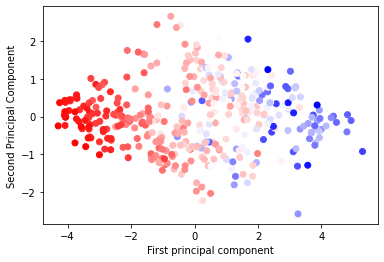

In [72]:
plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='bwr')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [73]:
X_pca.shape

(400, 2)

Training PCA transformed for Whole Dataset

In [74]:
X_pca_lr_train,X_pca_lr_test, y_pca_lr_train, y_pca_lr_test = train_test_split(X_pca, y_pca,shuffle=False, stratify=None, test_size=0.20, random_state=202)
X_pca_lr_train.shape,X_pca_lr_test.shape, y_pca_lr_train.shape, y_pca_lr_test.shape

((320, 2), (80, 2), (320,), (80,))

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
modelpca1=lr.fit(X_pca_lr_train,y_pca_lr_train)
y_pred_pca_lr=lr.predict(X_pca_lr_test)

y_pred_pca_test=modelpca1.predict(X_pca_lr_train)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_pca_lr_test,y_pred_pca_lr))
print('The MSE for Linear regression Train set',mean_squared_error(y_pca_lr_train,y_pred_pca_test))


The MSE for Linear regression Test set:  0.004563499283111238
The MSE for Linear regression Train set 0.004726165251247168


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Training PCA transformed for GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA (Removed Research) 

In [76]:
X_pca_1=college.drop(['Chance of Admit ','Research'],axis=1)
y_pca_1=college['Chance of Admit '].values
sc_data_1=scaler.fit_transform(X_pca_1)
X_pca_1=pca.fit_transform(sc_data_1)
print(X_pca_1.shape)

(400, 2)


Text(0, 0.5, 'Second Principal Component')

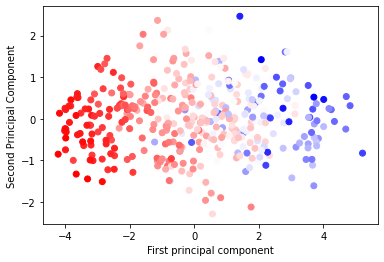

In [77]:
plt.figure()
plt.scatter(X_pca_1[:,0],X_pca_1[:,1],c=y_pca_1,cmap='bwr')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [78]:
X_pca_lr_train_1,X_pca_lr_test_1, y_pca_lr_train_1, y_pca_lr_test_1 = train_test_split(X_pca_1, y_pca_1,shuffle=False, stratify=None, test_size=0.20, random_state=202)
X_pca_lr_train_1.shape,X_pca_lr_test_1.shape, y_pca_lr_train_1.shape, y_pca_lr_test_1.shape

((320, 2), (80, 2), (320,), (80,))

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
modelpca1=lr.fit(X_pca_lr_train_1,y_pca_lr_train_1)
y_pred_pca_lr_1=lr.predict(X_pca_lr_test_1)

y_pred_pca_test1=modelpca1.predict(X_pca_lr_train_1)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_pca_lr_test_1,y_pred_pca_lr_1))
print('The MSE for Linear regression Train set',mean_squared_error(y_pca_lr_train_1,y_pred_pca_test1))

The MSE for Linear regression Test set:  0.004674900094626036
The MSE for Linear regression Train set 0.004588610261602332


C:\Users\vrund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


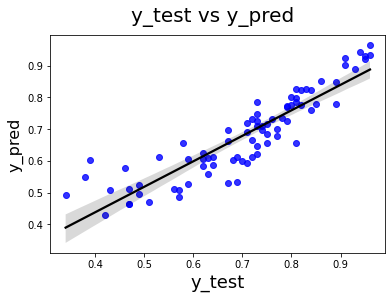

In [80]:
fig = plt.figure()
sns.regplot(y_pca_lr_test_1,y_pred_pca_lr_1,data=college,scatter_kws={"color": "blue"}, line_kws={"color": "black"})
fig.suptitle('y_test vs y_pred', fontsize = 20)    
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Saving to CSV file since it has lowest MSE among PCA transformed

In [81]:
#Saving to CSV file since it has lowest MSE among PCA transformed
with open('pred_for_PCA.csv', 'w') as f:
    for i in y_pred_pca_lr_1:
        print(i, file=f)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### THESE PCA ARE DONE TO MINE MORE ON THE DATA AND REASSURE THAT THE PCA WHERE THE RESESARCH FEATURE REMOVED THE MORE EFFICIENT ONE

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Training PCA transformed for GRE Score, TOEFL Score, University Rating, SOP, CGPA (Removed LOR, Research)

In [82]:
X_pca_2=college.drop(['Chance of Admit ','Research','LOR '],axis=1)
y_pca_2=college['Chance of Admit '].values
sc_data_2=scaler.fit_transform(X_pca_2)
X_pca_2=pca.fit_transform(sc_data_2)
print(X_pca_2.shape)

(400, 2)


Text(0, 0.5, 'Second Principal Component')

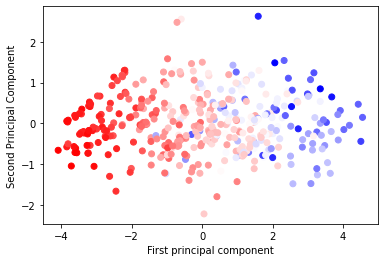

In [83]:
plt.figure()
plt.scatter(X_pca_2[:,0],X_pca_2[:,1],c=y_pca_2,cmap='bwr')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [84]:
X_pca_lr_train_2,X_pca_lr_test_2, y_pca_lr_train_2, y_pca_lr_test_2 = train_test_split(X_pca_2, y_pca_2,shuffle=False, stratify=None, test_size=0.20, random_state=202)
X_pca_lr_train_2.shape,X_pca_lr_test_2.shape, y_pca_lr_train_2.shape, y_pca_lr_test_2.shape

((320, 2), (80, 2), (320,), (80,))

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
modelpca2=lr.fit(X_pca_lr_train_2,y_pca_lr_train_2)
y_pred_pca_lr_2=lr.predict(X_pca_lr_test_2)

y_pred_pca_test2=modelpca2.predict(X_pca_lr_train_2)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_pca_lr_test_2,y_pred_pca_lr_2))
print('The MSE for Linear regression Train set',mean_squared_error(y_pca_lr_train_2,y_pred_pca_test2))


The MSE for Linear regression Test set:  0.004494447363632629
The MSE for Linear regression Train set 0.004748216592938556


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Training PCA Transformed for GRE Score, TOEFL Score, University Rating, CGPA (Removed LOR, Research, SOP)

In [86]:
X_pca_3=college.drop(['Chance of Admit ','Research','LOR ','SOP'],axis=1)
y_pca_3=college['Chance of Admit '].values
sc_data_3=scaler.fit_transform(X_pca_3)
X_pca_3=pca.fit_transform(sc_data_3)
print(X_pca_3.shape)

(400, 2)


Text(0, 0.5, 'Second Principal Component')

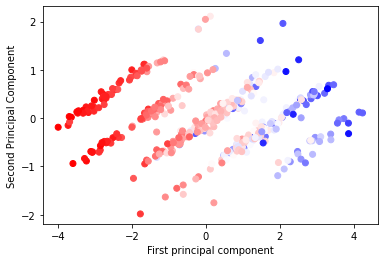

In [87]:
plt.figure()
plt.scatter(X_pca_3[:,0],X_pca_3[:,1],c=y_pca_3,cmap='bwr')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [88]:
X_pca_lr_train_3,X_pca_lr_test_3, y_pca_lr_train_3, y_pca_lr_test_3 = train_test_split(X_pca_3, y_pca_3,shuffle=False, stratify=None, test_size=0.20, random_state=202)
X_pca_lr_train_3.shape,X_pca_lr_test_3.shape, y_pca_lr_train_3.shape, y_pca_lr_test_3.shape

((320, 2), (80, 2), (320,), (80,))

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
modelpca3=lr.fit(X_pca_lr_train_3,y_pca_lr_train_3)
y_pred_pca_lr_3=lr.predict(X_pca_lr_test_3)

y_pred_pca_test3=modelpca3.predict(X_pca_lr_train_3)

print('The MSE for Linear regression Test set: ',mean_squared_error(y_pca_lr_test_3,y_pred_pca_lr_3))
print('The MSE for Linear regression Train set',mean_squared_error(y_pca_lr_train_3,y_pred_pca_test3))

The MSE for Linear regression Test set:  0.004630528817824854
The MSE for Linear regression Train set 0.004754690716976461


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visualizing the MSE of Linear regression and PCA using Test and Train Dataset

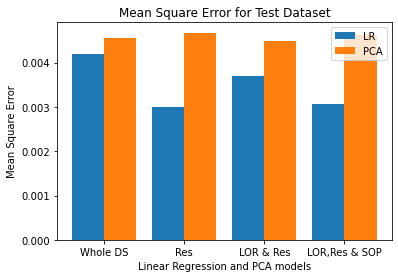

In [90]:
r1=mean_squared_error(y_05_test,y_pred_lr_05)
r2=mean_squared_error(y_pca_lr_test_1,y_pred_pca_lr_1)
w1=mean_squared_error(y_lr_test,y_pred_lr)
w2=mean_squared_error(y_pca_lr_test,y_pred_pca_lr)
lr1=mean_squared_error(y_08_test,y_pred_lr_08)
lr2=mean_squared_error(y_pca_lr_test_2,y_pred_pca_lr_2)
lrs1=mean_squared_error(y_09_test,y_pred_lr_09)
lrs2=mean_squared_error(y_pca_lr_test_3,y_pred_pca_lr_3)
X = ['Whole DS','Res','LOR & Res','LOR,Res & SOP']
lrpca = [w1,r1,lr1,lrs1]
mse = [w2,r2,lr2,lrs2]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, lrpca, 0.4, label = 'LR')
plt.bar(X_axis + 0.2, mse, 0.4, label = 'PCA')
  
plt.xticks(X_axis, X)
plt.xlabel("Linear Regression and PCA models")
plt.ylabel("Mean Square Error")
plt.title("Mean Square Error for Test Dataset")
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### To conclude, Linear Regression by removing one feature (i.e Research) is our best model, and it performs even better than training it again with PCA dimensionality reduction. Therefore, only Linear Regression training works better for this dataset.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------